In [8]:
import torch
torch.__version__

'1.11.0'

In [25]:
!pip install -U openmim
!mim install mmcv-full==1.7.1 -f https://download.openmmlab.com/mmcv/dist/cu11.3/torch1.11/index.html

Looking in links: https://download.openmmlab.com/mmcv/dist/cu11.3/torch1.11/index.html, https://download.openmmlab.com/mmcv/dist/cu113/torch1.11.0/index.html


openmimとは？
openmimは、Open Model Interchange Mechanism (MIM) の略で、主に OpenMMLab のエコシステムで提供されるツールやライブラリ（例：MMDetection、MMClassification）を簡単に管理するためのツールです。

OpenMIMは以下のような用途で利用されます：

OpenMMLabライブラリのインストールを簡単にする

OpenMIMは、OpenMMLabプロジェクト（例：MMDetection, MMSegmentation）を依存関係込みで簡単にインストールするためのツールです。
通常のpipでライブラリをインストールする場合と比べ、openmimは各ライブラリに最適なバージョンの依存関係を自動的に解決してくれます。
モデルのダウンロードと管理

各種の学習済みモデルを簡単にダウンロードして管理できます。
例：mim download mmdet faster_rcnn_r50_fpn_1x_coco で、MMDetectionで提供されるFaster R-CNNモデルをダウンロード。
カスタムモデルのトレーニングや評価の支援

OpenMIMを利用することで、OpenMMLabライブラリをスムーズに活用してカスタムモデルのトレーニングや推論を行えます。

mmcv-fullは、MMDetectionやMMSegmentationなどのOpenMMLabライブラリで必要になる依存関係の1つです。GPUを使ったモデル学習や推論を行う場合に、このカスタムビルドが必要になります。

In [9]:
import mmcv
mmcv.__version__

/opt/conda/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


'1.7.1'

In [22]:
!git clone https://github.com/open-mmlab/mmsegmentation.git

fatal: destination path 'mmsegmentation' already exists and is not an empty directory.


In [37]:
%cd mmsegmentation
!git checkout 0.x
!pip install -v -e .
%cd ..

Already on '0.x'
Your branch is up to date with 'origin/0.x'.
Using pip 24.3.1 from /opt/conda/lib/python3.8/site-packages/pip (python 3.8)
Obtaining file:///workspace/src/mmsegmentation
  Running command python setup.py egg_info
  running egg_info
  creating /tmp/pip-pip-egg-info-_n_qv66q/mmsegmentation.egg-info
  writing manifest file '/tmp/pip-pip-egg-info-_n_qv66q/mmsegmentation.egg-info/SOURCES.txt'
  writing manifest file '/tmp/pip-pip-egg-info-_n_qv66q/mmsegmentation.egg-info/SOURCES.txt'
  Preparing metadata (setup.py) ... done
  Attempting uninstall: mmsegmentation
    Found existing installation: mmsegmentation 0.30.0
    Can't uninstall 'mmsegmentation'. No files were found to uninstall.
  DEPRECATION: Legacy editable install of mmsegmentation==0.30.0 from file:///workspace/src/mmsegmentation (setup.py develop) is deprecated. pip 25.0 will enforce this behaviour change. A possible replacement is to add a pyproject.toml or enable --use-pep517, and use setuptools >= 64. If the

## Restart Notebook

for import `mmseg`

In [10]:
import mmseg
mmseg.__version__

'0.30.0'

## HLS Repository
https://github.com/NASA-IMPACT/hls-foundation-os/

In [70]:
# 最新版では動かなかったのでブランチ(revert-5-enhc-updates)を指定した（中平）
# 
!git clone -b revert-5-enhc-updates https://github.com/NASA-IMPACT/hls-foundation-os.git
# ---最新版---
# !git clone https://github.com/NASA-IMPACT/hls-foundation-os.git
# 最新版ではいるかも？
# import rioxarray
# !pip install rioxarray

Cloning into 'hls-foundation-os'...
remote: Enumerating objects: 610, done.
remote: Counting objects: 100% (216/216), done.
remote: Compressing objects: 100% (84/84), done.
Receiving objects:  97% (592/610)   eceiving objects:   4% (25/610)   Receiving objects:  20% (122/610)   Receiving objects:  31% (190/610)   Receiving objects:  71% (434/610)   Receiving objects:  98% (598/610)   Receiving objects:  99% (604/610), 2.87 MiB | 5.57 MiB/s   remote: Total 610 (delta 161), reused 150 (delta 132), pack-reused 394 (from 1)
Receiving objects: 100% (610/610), 4.03 MiB | 5.95 MiB/s, done.
Resolving deltas: 100% (358/358), done.


In [7]:
!wget https://huggingface.co/ibm-nasa-geospatial/Prithvi-100M-sen1floods11/resolve/main/sen1floods11_Prithvi_100M.pth -P ./pretrain/

--2024-11-20 10:24:31--  https://huggingface.co/ibm-nasa-geospatial/Prithvi-100M-sen1floods11/resolve/main/sen1floods11_Prithvi_100M.pth
Resolving huggingface.co (huggingface.co)... 18.65.159.63, 18.65.159.20, 18.65.159.75, ...
Connecting to huggingface.co (huggingface.co)|18.65.159.63|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.hf.co/repos/d9/f3/d9f3045ce9337d23d3ba36429a7e8a554e7daca02d4f38a79a19bf93682a65f5/c3b8af485ea03dab2a352c9269cb633a9f1550aa672733c1601306d4cd65b149?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27sen1floods11_Prithvi_100M.pth%3B+filename%3D%22sen1floods11_Prithvi_100M.pth%22%3B&Expires=1732357472&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTczMjM1NzQ3Mn19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5oZi5jby9yZXBvcy9kOS9mMy9kOWYzMDQ1Y2U5MzM3ZDIzZDNiYTM2NDI5YTdlOGE1NTRlN2RhY2EwMmQ0ZjM4YTc5YTE5YmY5MzY4MmE2NWY1L2MzYjhhZjQ4NWVhMDNkYWIyYTM1MmM5MjY5Y2I2MzNhOWYxNTUwYWE

In [13]:
%cd hls-foundation-os

/workspace/src/hls-foundation-os


## Flood

In [72]:
import os
os.makedirs('output/flood/', exist_ok=True)
os.makedirs('input/flood/', exist_ok=True)

In [21]:
ls ../..

README.md       compose_cloud.yml       dataset/  img/
Untitled.ipynb  compose_foundation.yml  env/      src/


In [22]:
import tifffile
import cv2
import numpy as np

img = tifffile.imread('../../dataset/ROIs1158_spring_s2/s2_1/ROIs1158_spring_s2_1_p30.tif')
print(img.shape, img.dtype)

# 13 --> 6
img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_CUBIC)
img_band = np.stack([
    img[:, :, 1], img[:, :, 2], img[:, :, 3], # RGB
    img[:, :, 6], img[:, :, 11], img[:, :, 12],
    ], 
    axis=0) 

print(img_band.shape, img_band.dtype)

# save as tif
tifffile.imwrite('input/flood/ROIs1158_spring_s2_1_p30_flood.tif', img_band)

(256, 256, 13) uint16
(6, 224, 224) uint16


## Config 修正
```python
channel_last=False
``` 
に変更する


In [28]:
!python model_inference.py -config configs/sen1floods11_config.py \
    -ckpt ../pretrain/sen1floods11_Prithvi_100M.pth \
    -input input/flood/ \
    -output output/flood/ -input_type tif -bands "[0,1,2,3,4,5]"

# 最新版
# !python model_inference.py -config configs/sen1floods11_config.py \
#     -ckpt ../pretrain/sen1floods11_Prithvi_100M.pth \
#     -input input/flood/ \
#     -output output/flood/ -input_type tif -bands 0 1 2 3 4 5

/opt/conda/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.18). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/workspace/src/mmsegmentation/mmseg/models/decode_heads/decode_head.py:104: UserWarning: For binary segmentation, we suggest using`out_channels = 1` to define the outputchannels of segmentor, and use `threshold`to convert seg_logist into a predictionapplying 

(224, 224)


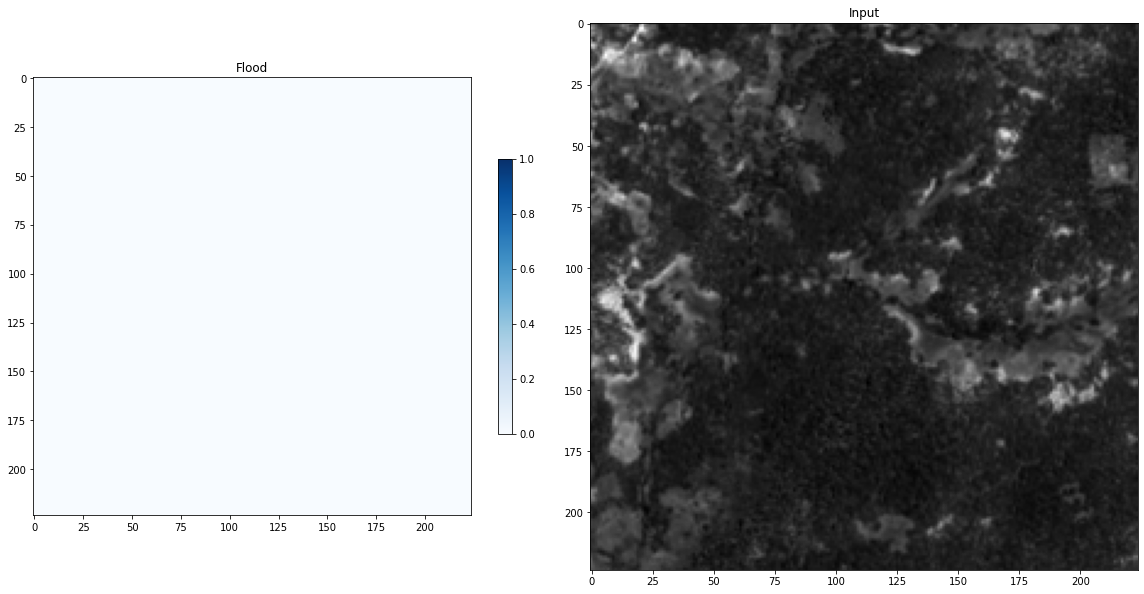

In [23]:
PATH_OUT = f'output/flood/ROIs1158_spring_s2_1_p30_flood_pred.tif'

import matplotlib.pyplot as plt
pred_t0 = tifffile.imread(PATH_OUT)
print(pred_t0.shape)

# plot image
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.title('Flood')
plt.imshow(pred_t0, cmap='Blues', vmin=0, vmax=1)
plt.colorbar(shrink=0.5)

plt.subplot(1, 2, 2)
plt.title('Input')
plt.imshow(img_band[1], cmap='gray')

# off grid
plt.tight_layout()
plt.grid(False)

In [99]:
import pandas as pd
import glob
root = '../dataset/ROIs1158_spring_s2'
tiles = pd.DataFrame(glob.glob(os.path.join(root,'*','*.tif')), columns=["path"])
split = tiles["path"].apply(lambda path: os.path.basename(path).split('_'))
#split = pd.DataFrame.from_records(split, columns=["seed","season","sensor","wether", "region","tile"])
split = pd.DataFrame.from_records(split, columns=["seed","season","sensor", "region","tile"])
tiles = tiles.join(split)

# xy = pd.DataFrame.from_records(tiles["path"].apply(get_xy), columns=["x","y"])
# tiles = tiles.reset_index().join(xy)

### region 101 〒861-3208 熊本県上益城郡御船町滝尾５４５０
### region 132 〒376-0013 群馬県桐生市広沢町３丁目４１９１−１
### region 141 〒400-1513 山梨県中央市大鳥居
target_tiles = tiles[tiles['region'].isin(['101', '132', '141'])]
#target_tiles[0:2]['path'].values

In [106]:
target_tiles = tiles[tiles['region'].isin(['132'])]
target_tiles[:3].shape

(3, 6)

In [119]:
input_files = target_tiles[:1].path.values
file_name_without_extension = os.path.splitext(os.path.basename(input_files[0]))[0]
out_files = 

In [120]:
out_files

'input/ROIs1158_spring_s2_132_p233_flood.tif'

In [24]:
import tifffile
import cv2
import numpy as np
import os
import pandas as pd
import glob
root = '../../dataset/ROIs1158_spring_s2'
tiles = pd.DataFrame(glob.glob(os.path.join(root,'*','*.tif')), columns=["path"])
split = tiles["path"].apply(lambda path: os.path.basename(path).split('_'))
#split = pd.DataFrame.from_records(split, columns=["seed","season","sensor","wether", "region","tile"])
split = pd.DataFrame.from_records(split, columns=["seed","season","sensor", "region","tile"])
tiles = tiles.join(split)

# xy = pd.DataFrame.from_records(tiles["path"].apply(get_xy), columns=["x","y"])
# tiles = tiles.reset_index().join(xy)

### region 101 〒861-3208 熊本県上益城郡御船町滝尾５４５０
### region 132 〒376-0013 群馬県桐生市広沢町３丁目４１９１−１
### region 141 〒400-1513 山梨県中央市大鳥居
target_tiles = tiles[tiles['region'].isin(['101', '132', '141'])]

input_files = target_tiles[:3].path.values
output_files = []
for ifn in input_files:
    base = os.path.splitext(os.path.basename(ifn))[0]
    ofn  = os.path.join('input/flood2', base+'_flood.tif')
    img = tifffile.imread(ifn)    
    # 13 --> 6
    img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_CUBIC)
    img_band = np.stack([
        img[:, :, 1], img[:, :, 2], img[:, :, 3], # RGB
        img[:, :, 6], img[:, :, 11], img[:, :, 12],
        ], 
        axis=0)    
    # save as tif
    tifffile.imwrite(ofn, img_band)
    print(ofn)


input/flood2/ROIs1158_spring_s2_132_p233_flood.tif
input/flood2/ROIs1158_spring_s2_132_p743_flood.tif
input/flood2/ROIs1158_spring_s2_132_p480_flood.tif


In [ ]:
import matplotlib.pyplot as plt
pred_t0 = tifffile.imread(PATH_OUT)
print(pred_t0.shape)

# plot image
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.title('Flood')
plt.imshow(pred_t0, cmap='Blues', vmin=0, vmax=1)
plt.colorbar(shrink=0.5)

plt.subplot(1, 2, 2)
plt.title('Input')
plt.imshow(img_band[1], cmap='gray')

# off grid
plt.tight_layout()
plt.grid(False)

In [29]:
!python model_inference.py -config configs/sen1floods11_config.py \
    -ckpt ../pretrain/sen1floods11_Prithvi_100M.pth \
    -input input/flood/ \
    -output output/flood/ -input_type tif -bands "[0,1,2,3,4,5]"

/opt/conda/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.18). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/workspace/src/mmsegmentation/mmseg/models/decode_heads/decode_head.py:104: UserWarning: For binary segmentation, we suggest using`out_channels = 1` to define the outputchannels of segmentor, and use `threshold`to convert seg_logist into a predictionapplying 

In [32]:
!python model_inference.py -config configs/sen1floods11_config.py \
    -ckpt ../pretrain/sen1floods11_Prithvi_100M.pth \
    -input input/flood2/ \
    -output output/flood2/ -input_type tif -bands "[0,1,2,3,4,5]"

/opt/conda/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.18). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/workspace/src/mmsegmentation/mmseg/models/decode_heads/decode_head.py:104: UserWarning: For binary segmentation, we suggest using`out_channels = 1` to define the outputchannels of segmentor, and use `threshold`to convert seg_logist into a predictionapplying 

In [144]:
PATH_OUT = f'output/flood2/ROIs1158_spring_s2_132_p233_flood_pred.tif'

import matplotlib.pyplot as plt
pred_t0 = tifffile.imread(PATH_OUT)
print(pred_t0.shape)

# plot image
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.title('Flood')
plt.imshow(pred_t0, cmap='Blues', vmin=0, vmax=1)
plt.colorbar(shrink=0.5)

plt.subplot(1, 2, 2)
plt.title('Input')
plt.imshow(img_band[1], cmap='gray')

# off grid
plt.tight_layout()
plt.grid(False)

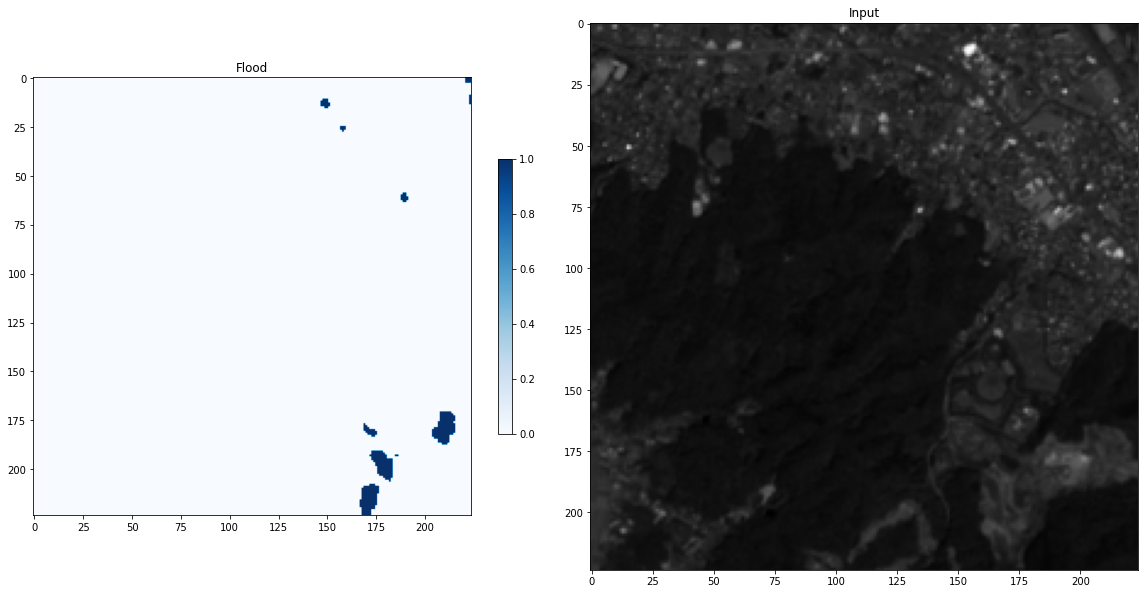

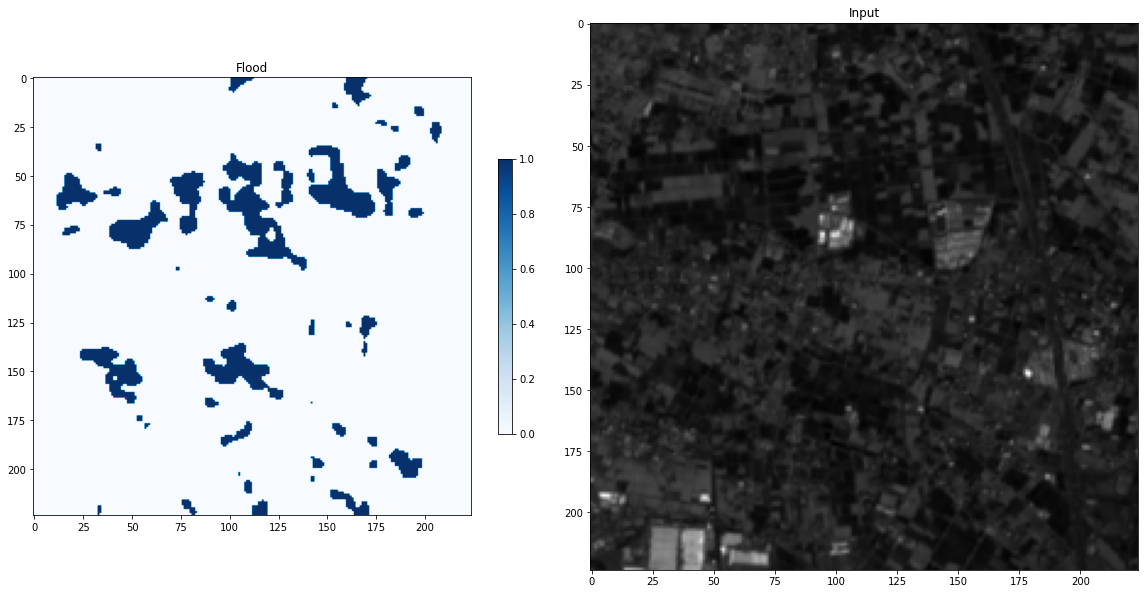

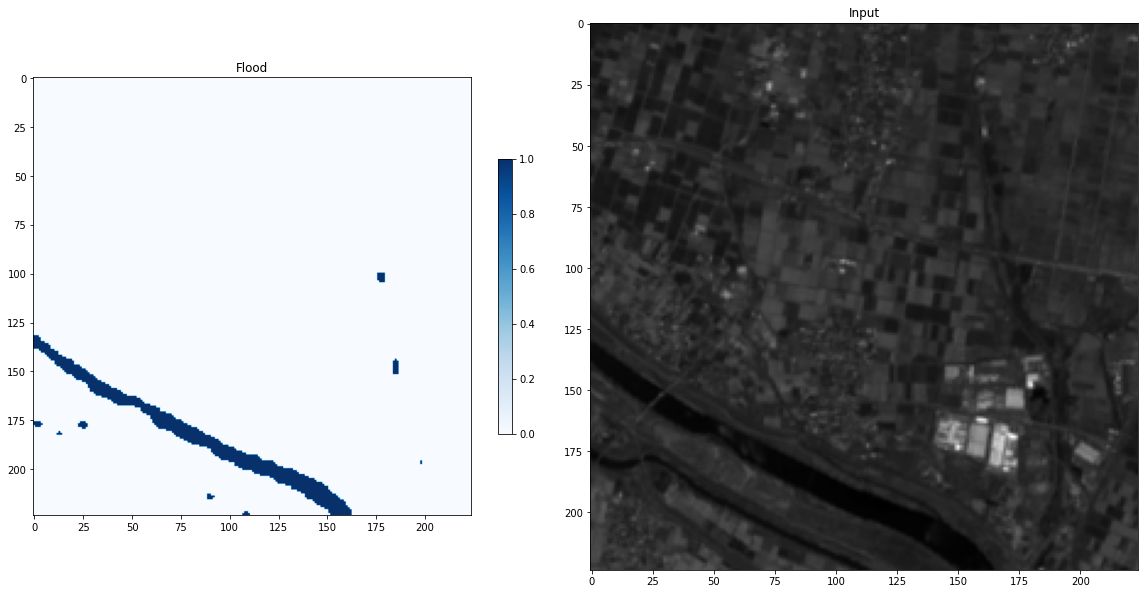

In [33]:
target_tiles = tiles[tiles['region'].isin(['101', '132', '141'])]

input_files = target_tiles[:3].path.values
output_files = []
for fn in input_files:
    base = os.path.splitext(os.path.basename(fn))[0]
    orig_fn  = os.path.join('input/flood2', base+'_flood.tif')
    pred_fn  = os.path.join('output/flood2', base+'_flood_pred.tif')
    img_band = tifffile.imread(orig_fn)
    pred_t0 = tifffile.imread(pred_fn)
    
    # plot image
    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.title('Flood')
    plt.imshow(pred_t0, cmap='Blues', vmin=0, vmax=1)
    plt.colorbar(shrink=0.5)
    
    plt.subplot(1, 2, 2)
    plt.title('Input')
    plt.imshow(img_band[1], cmap='gray')
    
    # off grid
    plt.tight_layout()
    plt.grid(False)



In [145]:
torch.cuda.is_available()

True

In [ ]:

img = tifffile.imread('../../../dataset/ROIs1158_spring_s2/s2_1/ROIs1158_spring_s2_1_p30.tif')
print(img.shape, img.dtype)

# 13 --> 6
img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_CUBIC)
img_band = np.stack([
    img[:, :, 1], img[:, :, 2], img[:, :, 3], # RGB
    img[:, :, 6], img[:, :, 11], img[:, :, 12],
    ], 
    axis=0) 

print(img_band.shape, img_band.dtype)

# save as tif
tifffile.imwrite('input/flood/ROIs1158_spring_s2_1_p30_flood.tif', img_band)

!python model_inference.py -config configs/sen1floods11_config.py \
    -ckpt ../../pretrain/sen1floods11_Prithvi_100M.pth \
    -input input/flood/ \
    -output output/flood/ -input_type tif -bands "[0,1,2,3,4,5]"